In [1]:
import tensorflow as tf
import os
import time
os.environ["TF_CPP_MIN_LOG_LEVEL"]= "2"
print("tensorflow Version is: " + str(tf.__version__))

import numpy as np
os.environ['KERAS_BACKEND'] = 'tensorflow'

from keras import backend as K
print(os.environ['KERAS_BACKEND'])

tensorflow Version is: 1.14.0


Using TensorFlow backend.


tensorflow


In [2]:
np.random.seed(42)
tf.set_random_seed(42)

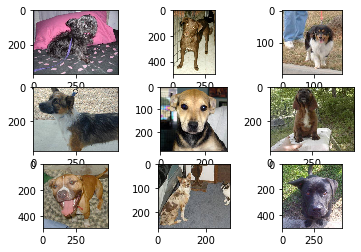

In [5]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
display()

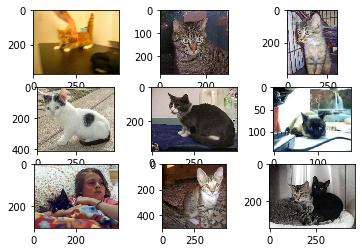

In [4]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
display()

In [ ]:
## RUN ONLY ONCE ##

# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [6]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

In [7]:
# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model(model_name='custom'):
    if model_name not in ['custom', 'vgg16', 'resnet50', 'inceptionv3']:
        print('Supported models: custom, vgg16, resnet50, inceptionv3')
        print('Picking inceptionv3 in absence of valid specification')
    if model_name=='custom':
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',
                         input_shape=(224, 224, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model
    elif model_name=='vgg16':
        # load model
        model = VGG16(include_top=False, input_shape=(224, 224, 3))
        # mark loaded layers as not trainable
        for layer in model.layers:
            layer.trainable = False
        # add new classifier layers
        flat1 = Flatten()(model.layers[-1].output)
        class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
        output = Dense(1, activation='sigmoid')(class1)
        # define new model
        model = Model(inputs=model.inputs, outputs=output)
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model
    elif model_name=='resnet50':
        # load model
        model = ResNet50(include_top=False, input_shape=(224, 224, 3))
        # mark loaded layers as not trainable
        for layer in model.layers:
            layer.trainable = False
        # add new classifier layers
        flat1 = Flatten()(model.layers[-1].output)
        class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
        output = Dense(1, activation='sigmoid')(class1)
        # define new model
        model = Model(inputs=model.inputs, outputs=output)
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model
    else:
        # load model
        model = InceptionV3(include_top=False, input_shape=(224, 224, 3))
        # mark loaded layers as not trainable
        for layer in model.layers:
            layer.trainable = False
        # add new classifier layers
        flat1 = Flatten()(model.layers[-1].output)
        class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
        output = Dense(1, activation='sigmoid')(class1)
        # define new model
        model = Model(inputs=model.inputs, outputs=output)
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model
    
     

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(history,name):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = name
    pyplot.savefig(filename + '_plot.png')
    display()
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness(model_name):
    # define model
    model = define_model(model_name)
    # create data generators
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True,
        featurewise_center=True)
    train_datagen.mean=[123.68, 116.779, 103.939]

    test_datagen = ImageDataGenerator(rescale=1.0/255.0,featurewise_center=True)
    test_datagen.mean=[123.68, 116.779, 103.939]

    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=32, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history, model_name)

In [11]:
# entry point, run the test harness
for name in ['custom', 'vgg16', 'resnet50', 'inceptionv3']:
    run_test_harness(name)
    

Found 18715 images belonging to 2 classes.
Found 6285 images belonging to 2 classes.
Epoch 1/50
 10/585 [..............................] - ETA: 1:27:53 - loss: 8.3613 - acc: 0.4813

KeyboardInterrupt: 